In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('Desktop/Mnist/train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)

In [5]:
m,n = data.shape
print(m,n)

42000 785


In [6]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]

In [7]:
X_train[0].shape

(41000,)

In [22]:
layers_dims = [784,8,6,10]

In [9]:
def initialize_parameters_deep(layer_dims):
    parameters = {}
    L = len(layer_dims) 

    for l in range(1, L):
        
        parameters["W"+str(l)] = np.random.randn(layer_dims[l] , layer_dims[l-1])*0.01
        parameters["b"+str(l)] = np.zeros((layer_dims[l],1))

        
    return parameters

In [10]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
print(softmax([3.2,1.3,0.2,0.8]))

[0.77514955 0.11593805 0.03859242 0.07031998]


In [11]:
def relu(Z):
    
    A = np.maximum(0,Z) 
    return A

In [12]:
def relu_backward(z):
    z[z > 0] = 1
    z[z < 0] = 0
    return z

In [13]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [14]:
def get_predictions(A3):
    return np.argmax(A3, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [15]:
def linear_forward(A, W, b):
    Z = np.dot(W,A) + b
    
    return Z

In [16]:
def linear_activation_forward(A_prev, W, b, activation):
   
    if activation == "softmax":
        Z = linear_forward(A_prev, W, b)
        A = softmax(Z)
    
    elif activation == "relu":
        Z  = linear_forward(A_prev, W, b)
        A  = relu(Z)

    return A, Z

In [17]:
def model_forward(X, W1, b1, W2, b2, W3, b3):
    
    A1, Z1 = linear_activation_forward(X, W1, b1, activation = "relu")
    A2, Z2 = linear_activation_forward(A1, W2, b2, activation = "relu")
    A3, Z3 = linear_activation_forward(A2, W3, b3, activation = "softmax")
          
    return A3, A2, A1, Z1, Z2, Z3

In [18]:
def model_backwards(A3, A2, A1, W3, W2, Z1, Z2, X, Y, m) :
    
    dZ3 = A3 - one_hot(Y)
    dW3 = np.dot(dZ3,A2.T)/m
    db3 = 1 / m * np.sum(dZ3)
    dA2 = np.dot(W3.T,dZ3)
    dZ2 = dA2 * relu_backward(Z2)
    dW2 = np.dot(dZ2,A1.T)/m
    db2 = 1 / m * np.sum(dZ2)
    dA1 = np.dot(W2.T,dZ2)
    dZ1 = dA1 * relu_backward(Z1)
    dW1 = np.dot(dZ1,X.T)/m
    db1 = 1 / m * np.sum(dZ1)
    
    return dW3, dW2, dW1, db3, db2, db1

In [19]:
def update_parameters(W1, b1, W2, b2, W3, b3, dW3, dW2, dW1, db3, db2, db1, learning_rate):
    
#     W1 = params["W1"]
#     b1 = params["b1"]
#     W2 = params["W2"]
#     b2 = params["b2"]
#     W3 = params["W3"]
#     b3 = params["b3"]
    W1 = W1 - learning_rate*dW1
    W2 = W2 - learning_rate*dW2
    W3 = W3 - learning_rate*dW3
    b1 = b1 - learning_rate*db1
    b2 = b2 - learning_rate*db2
    b3 = b3 - learning_rate*db3
    
    return W1, b1, W2, b2, W3, b3

In [20]:
def model(X,Y,layers_dims, learning_rate, num_iterations):
    m = X.shape[1]
    parameters = initialize_parameters_deep(layers_dims)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]

    
    for i in range(0, num_iterations):
        A3, A2, A1, Z1, Z2, Z3 = model_forward(X, W1, b1, W2, b2, W3, b3)
        dW3, dW2, dW1, db3, db2, db1 = model_backwards(A3, A2, A1, W3, W2,Z1,Z2, X, Y, m)
        W1, b1, W2, b2, W3, b3 = update_parameters(W1, b1, W2, b2, W3, b3, dW3, dW2, dW1, db3, db2, db1, learning_rate)
        if i % 10 == 0:
            print("Iteration: ", i)
#             print(W3)
#             print("Iteration: ", i)
            predictions = get_predictions(A3)
            print(get_accuracy(predictions, Y))
            
    return W1, b1, W2, b2, W3, b3

In [23]:
W1, b1, W2, b2, W3, b3 = model(X_train, Y_train, layers_dims, learning_rate = 0.01, num_iterations = 500)

Iteration:  0
[3 2 5 ... 2 0 3] [1 5 1 ... 7 6 9]
0.09348780487804878
Iteration:  10
[3 2 1 ... 2 3 2] [1 5 1 ... 7 6 9]
0.12904878048780488
Iteration:  20
[3 7 1 ... 7 1 7] [1 5 1 ... 7 6 9]
0.19963414634146343
Iteration:  30
[7 7 7 ... 7 1 7] [1 5 1 ... 7 6 9]
0.17280487804878047
Iteration:  40
[3 7 3 ... 7 1 7] [1 5 1 ... 7 6 9]
0.18897560975609756
Iteration:  50
[3 7 3 ... 7 0 7] [1 5 1 ... 7 6 9]
0.22885365853658537
Iteration:  60
[1 0 1 ... 7 0 7] [1 5 1 ... 7 6 9]
0.47668292682926827
Iteration:  70
[8 4 8 ... 7 0 7] [1 5 1 ... 7 6 9]
0.26021951219512196
Iteration:  80
[0 6 0 ... 7 0 9] [1 5 1 ... 7 6 9]
0.31429268292682927
Iteration:  90
[0 6 0 ... 7 6 9] [1 5 1 ... 7 6 9]
0.36421951219512194
Iteration:  100
[0 6 0 ... 7 0 9] [1 5 1 ... 7 6 9]
0.3918048780487805
Iteration:  110
[3 6 0 ... 7 0 9] [1 5 1 ... 7 6 9]
0.4151463414634146
Iteration:  120
[3 6 7 ... 7 0 9] [1 5 1 ... 7 6 9]
0.4377560975609756
Iteration:  130
[0 6 0 ... 7 2 7] [1 5 1 ... 7 6 9]
0.48748780487804877
Iterat

In [25]:
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    A3, A2, A1, Z1, Z2, Z3 = model_forward(X, W1, b1, W2, b2, W3, b3)
    predictions = get_predictions(A3)
    return predictions

def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None],W1, b1, W2, b2, W3, b3)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


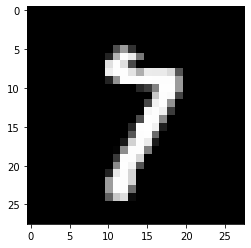

In [27]:
test_prediction(3, W1, b1, W2, b2, W3, b3)